In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\Win10\Desktop\zip\projects\DATA_SCIENCE\hotel_booking.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [26]:
def metadata(df):
    null_values = df.isnull().sum()
    nunique = df.nunique()
    data_type = df.dtypes
    percent = (df.isnull().sum()/ len(df))*100
    columns = list(df.columns)

    meta_dff = pd.DataFrame({"colum_name":columns,"null_values":null_values,"percent":percent,"data_type":data_type,"nunique":nunique}).reset_index(drop=True)
    return meta_dff

In [28]:
metadata(df)

,colum_name,null_values,percent,data_type,nunique
0,hotel,0,0.000000,object,2
1,is_canceled,0,0.000000,int64,2
2,lead_time,0,0.000000,int64,479
3,arrival_date_year,0,0.000000,int64,3
4,arrival_date_month,0,0.000000,object,12
5,arrival_date_week_number,0,0.000000,int64,53
6,arrival_date_day_of_month,0,0.000000,int64,31
7,stays_in_weekend_nights,0,0.000000,int64,17
8,stays_in_week_nights,0,0.000000,int64,35
9,adults,0,0.000000,int64,14


In [36]:
df.drop("company",axis=1,inplace=True)

In [39]:
metadata(df)

,colum_name,null_values,percent,data_type,nunique
0,hotel,0,0.000000,object,2
1,is_canceled,0,0.000000,int64,2
2,lead_time,0,0.000000,int64,479
3,arrival_date_year,0,0.000000,int64,3
4,arrival_date_month,0,0.000000,object,12
5,arrival_date_week_number,0,0.000000,int64,53
6,arrival_date_day_of_month,0,0.000000,int64,31
7,stays_in_weekend_nights,0,0.000000,int64,17
8,stays_in_week_nights,0,0.000000,int64,35
9,adults,0,0.000000,int64,14


In [38]:
df.drop("agent",axis=1,inplace=True)

In [41]:
for col in df.describe(include="O"):
    print(col)
    print(df[col].unique())
    print(">"*50)

hotel
['Resort Hotel' 'City Hotel']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [42]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [43]:
df.dropna(inplace=True)

In [44]:
metadata(df)

,colum_name,null_values,percent,data_type,nunique
0,hotel,0,0.0,object,2
1,is_canceled,0,0.0,int64,2
2,lead_time,0,0.0,int64,479
3,arrival_date_year,0,0.0,int64,3
4,arrival_date_month,0,0.0,object,12
5,arrival_date_week_number,0,0.0,int64,53
6,arrival_date_day_of_month,0,0.0,int64,31
7,stays_in_weekend_nights,0,0.0,int64,15
8,stays_in_week_nights,0,0.0,int64,33
9,adults,0,0.0,int64,14


In [45]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [46]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


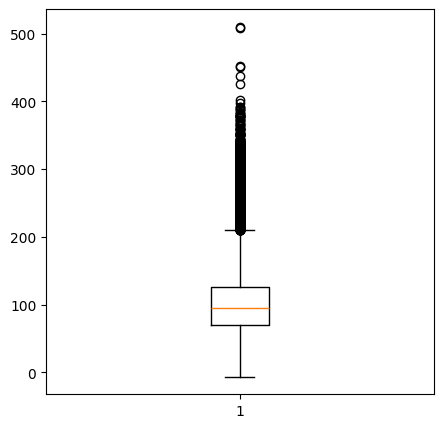

In [56]:
plt.figure(figsize=[5,5])
plt.boxplot(df[df.adr < 5000].adr)
plt.show()

In [57]:
df = df[df.adr < 5000]

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


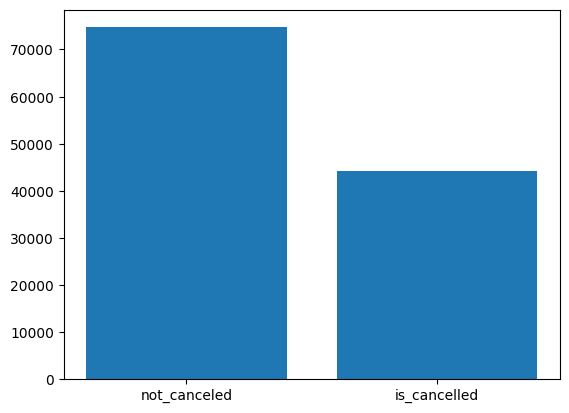

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [59]:
cancel_count = df['is_canceled'].value_counts(normalize=True)
print(cancel_count)
print(">"*50)

plt.bar(["not_canceled","is_cancelled"],df['is_canceled'].value_counts())
plt.show()
print(">"*50)

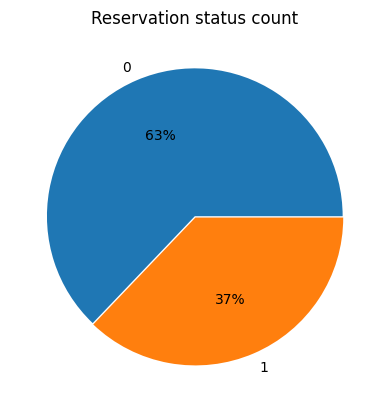

In [64]:
ex = [0,0.01]
plt.pie(cancel_count, labels=cancel_count.index, autopct='%.0f%%',explode=ex)
plt.title("Reservation status count")
plt.show()

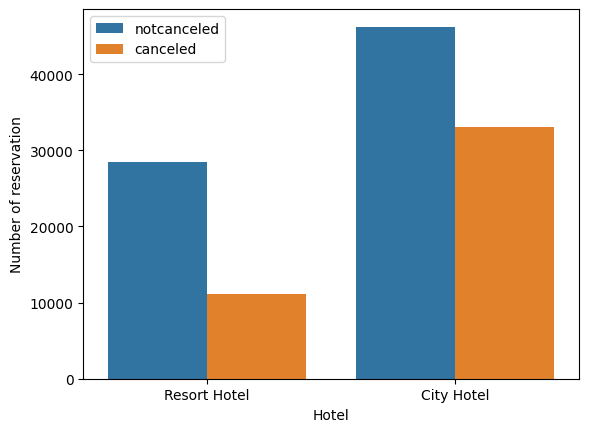

In [67]:
sns.countplot(x = "hotel",hue="is_canceled",data=df)
plt.xlabel("Hotel")
plt.ylabel("Number of reservation")
plt.legend(['notcanceled','canceled'])

In [71]:
resort_hotel = df[df['hotel']=="Resort Hotel"]
city_hotel = df[df['hotel']== "City Hotel"]
print("resort Hotel")
print(resort_hotel['is_canceled'].value_counts(normalize=True))
print("City Hotel")
print(city_hotel['is_canceled'].value_counts(normalize=True))


resort Hotel
is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64
City Hotel
is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64


In [72]:
resort_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [73]:
resort_hotel = resort_hotel.groupby(['reservation_status_date'])[['adr']].mean()
city_hotel = city_hotel.groupby(['reservation_status_date'])[['adr']].mean()

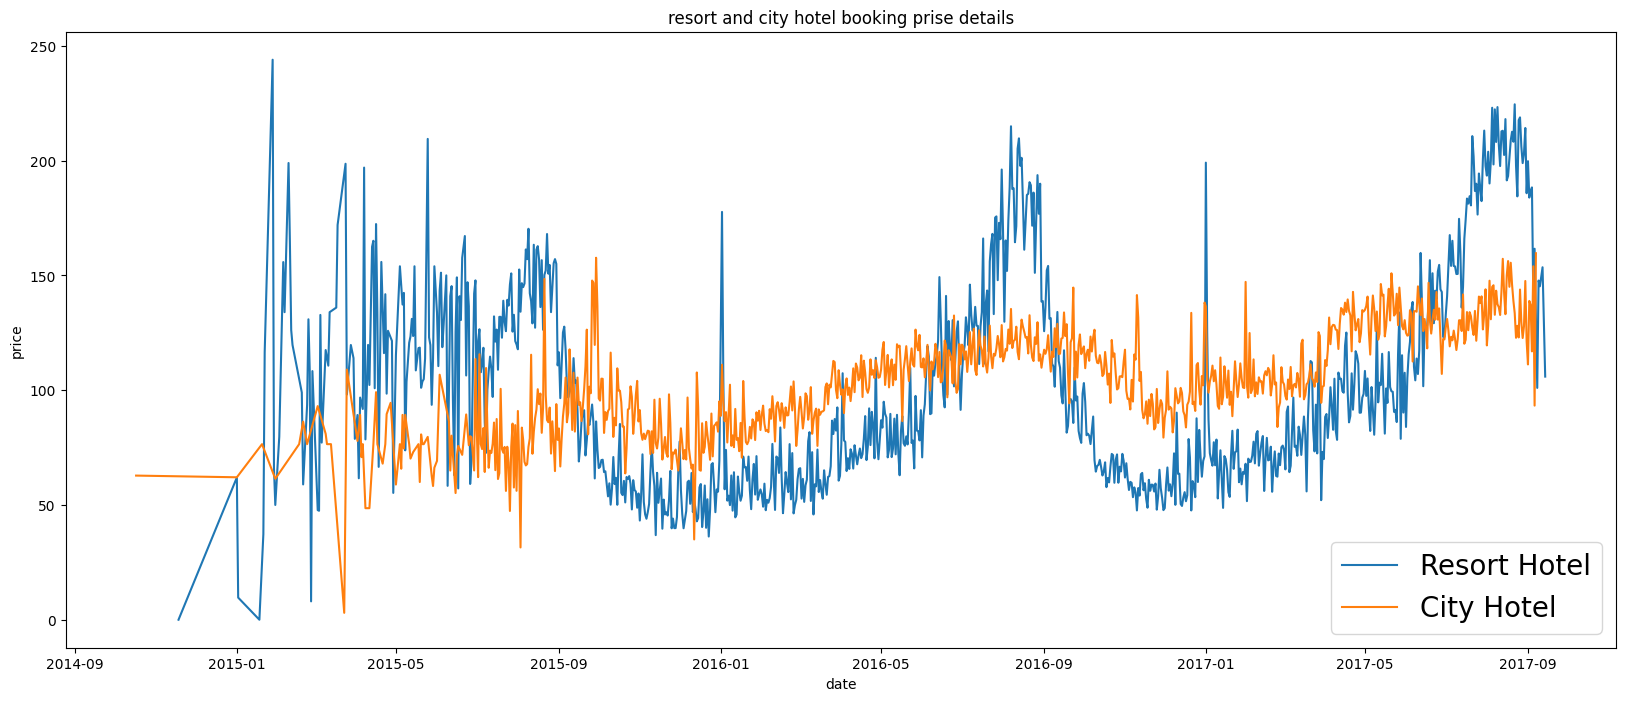

In [78]:
plt.figure(figsize=(20,8))
plt.title("resort and city hotel booking prise details")
plt.plot(resort_hotel.index,resort_hotel.adr,label = "Resort Hotel")
plt.plot(city_hotel.index,city_hotel.adr,label = "City Hotel")
plt.legend(fontsize=20)
plt.xlabel("date")
plt.ylabel("price")
plt.show()

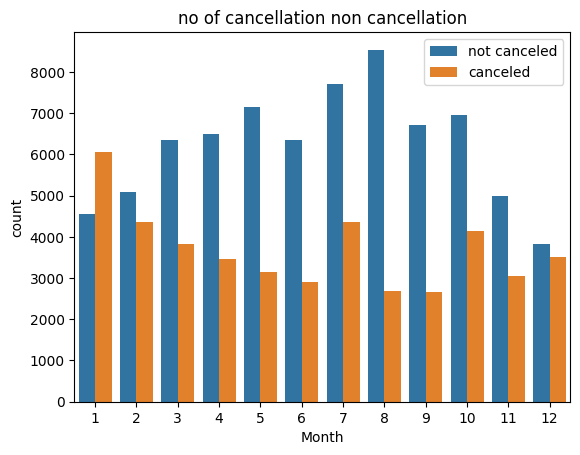

In [82]:
df['Month'] = df['reservation_status_date'].dt.month
sns.countplot(x="Month",hue="is_canceled",data=df)
plt.title("no of cancellation non cancellation")
plt.legend(["not canceled","canceled"])
plt.show()

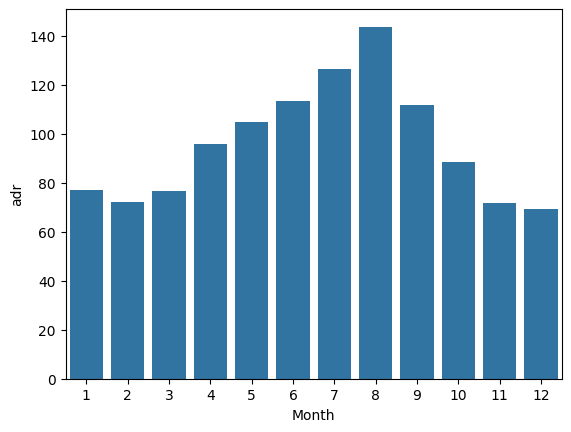

In [88]:
sns.barplot(x="Month",y="adr",data=df[df['is_canceled'] == 0].groupby('Month')[['adr']].mean().reset_index())
plt.show()

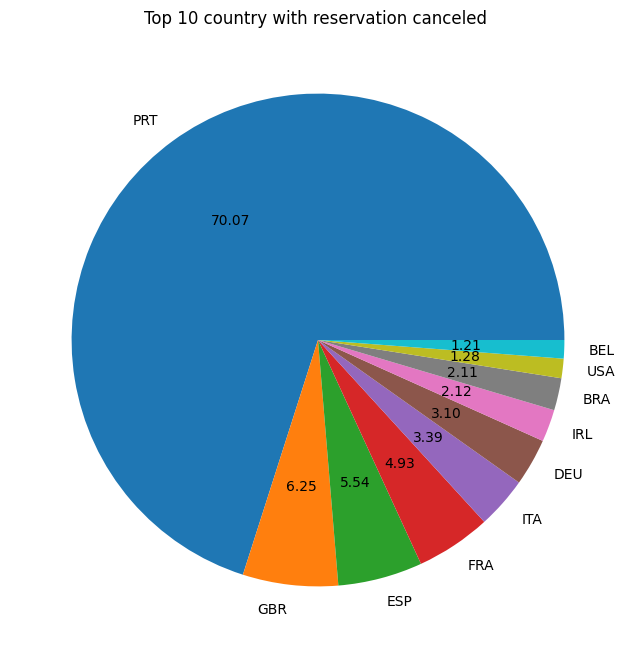

In [89]:
canceled_data = df[df["is_canceled"] == 1]
top_10_country = canceled_data["country"].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title("Top 10 country with reservation canceled ")
plt.pie(top_10_country,autopct = "%.2f",labels = top_10_country.index)
plt.show()

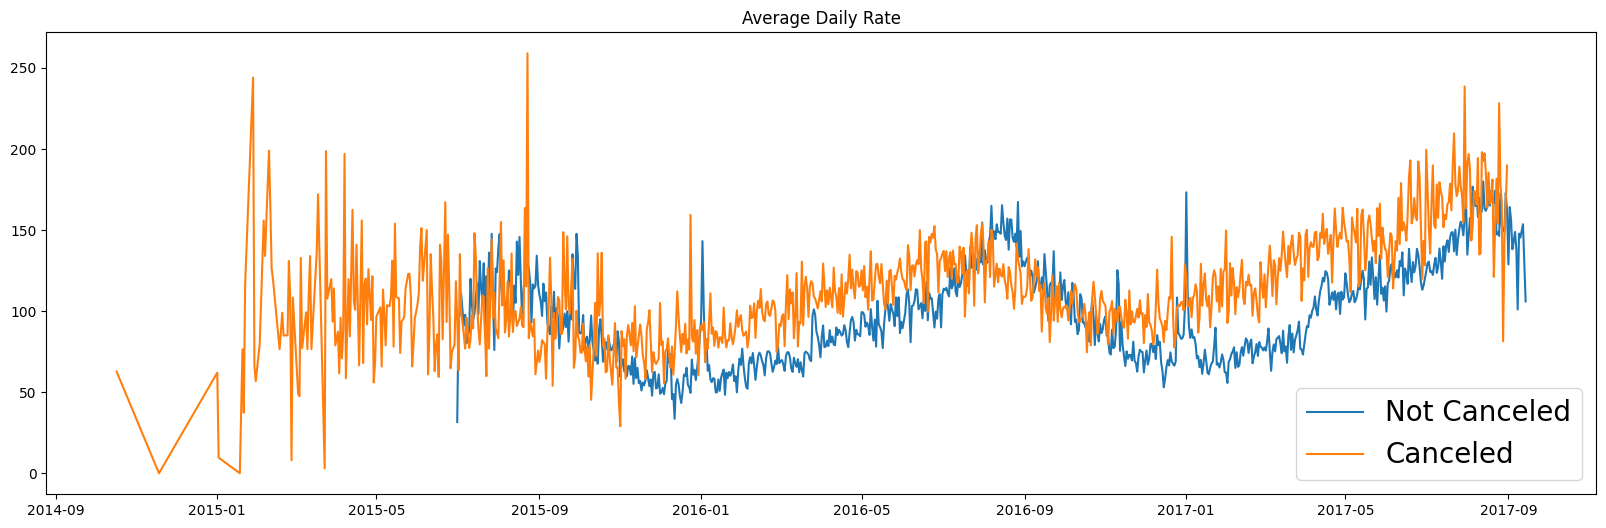

In [90]:
canceled_df_adr = canceled_data.groupby("reservation_status_date")[["adr"]].mean()
canceled_df_adr.reset_index(inplace = True)
canceled_df_adr.sort_values("reservation_status_date",inplace = True)

not_canceled_data = df[df["is_canceled"] == 0]
not_canceled_df_adr = not_canceled_data.groupby("reservation_status_date")[["adr"]].mean()
not_canceled_df_adr.reset_index(inplace = True)
not_canceled_df_adr.sort_values("reservation_status_date",inplace = True)


plt.figure(figsize = (20,6))
plt.title("Average Daily Rate")
plt.plot(not_canceled_df_adr["reservation_status_date"],not_canceled_df_adr["adr"],label = "Not Canceled")
plt.plot(canceled_df_adr["reservation_status_date"],canceled_df_adr["adr"],label = "Canceled")
plt.legend(fontsize=20)
plt.show()